<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/k2_pix_small.png">
*This notebook contains an excerpt instructional material from [gully](https://twitter.com/gully_) and the [K2 Guest Observer Office](https://keplerscience.arc.nasa.gov/); the content is available [on GitHub](https://github.com/gully/goldenrod).*


<!--NAVIGATION-->
< [Spot check some Target Pixel Files](01.04-Spot_check_TPFs.ipynb) | [Contents](Index.ipynb) | [Spot-check Everest Validation Summaries for KEGS](01.06-Everest_KEGS_DVS.ipynb) >

# KEGS galaxies reduced with EVEREST

In this notebook we explore which KEGS targets were reduced with the EVEREST pipeline, and we spot check the light-curves.  In general, EVEREST is not well-suited to deciphering transient signals like those from Supernovae, and so should not be used without additional feature development or enhanced regularization.

In [2]:
import matplotlib.payplot as plt
import numpy as np
from astropy.io import fits

In [3]:
import astropy
import os
import pandas as pd
import seaborn as sns
from astropy.utils.console import ProgressBar

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
df_kegs = pd.read_csv('../metadata/KEGS_TPF_metadata.csv')

In [6]:
df_kegs.head(2)

,KEPLERID,CHANNEL,MODULE,OUTPUT,CAMPAIGN,DATA_REL,OBSMODE,TTABLEID,RA_OBJ,DEC_OBJ,...,PMDEC,GMAG,RMAG,IMAG,ZMAG,JMAG,HMAG,KMAG,KEPMAG,filename
0,200084871,27,9,3,101,15,LC,87,189.450849,-1.344623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ktwo200084871-c101_lpd-targ.fits.gz
1,200084871,27,9,3,102,15,LC,87,189.449198,-1.348091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ktwo200084871-c102_lpd-targ.fits.gz


In [7]:
import everest

In [8]:
everest_path = '../../everest/everest/missions/k2/tables/'

In [9]:
! head ../../everest/everest/missions/k2/tables/c05.stars

211410542,13.518,34,False
212161956,14.778,71,False
211786890,12.771,42,False
211695001,14.872,44,False
211816678,14.237,42,False
211722074,11.995,21,False
212170917,11.988,31,False
212082892,13.268,70,False
211900508,14.323,66,False
211606712,11.423,37,False


I do not know what column 4 is.

In [10]:
c05_everest = pd.read_csv(everest_path + 'c05.stars', names=['EPIC_ID', 'KepMag', 'Channel', 'col4'])

In [11]:
kegs_everest_c05 = pd.merge(df_kegs, c05_everest, how='inner', left_on='KEPLERID', right_on='EPIC_ID')

- How many KEGS sources are there in Campaign 5?
- How many sources of any type did Everest detrend in Campaign 5?
- How many KEGS sources did Everest detrend in Campaign 5?

In [12]:
len(df_kegs[df_kegs.CAMPAIGN==5]), len(c05_everest), len(kegs_everest_c05)

(906, 23074, 326)

About 1/3 of the KEGS Campaign 5 sources have Everest-detrended lightcurves available.  
The metadata checks out.

In [13]:
#sns.lmplot('CHANNEL', 'Channel', kegs_everest_c05, )
#sns.lmplot('KEPMAG', 'KepMag', kegs_everest_c05)

Which KEGS sources were selected for Everest?

In [14]:
complement = (~df_kegs.KEPLERID.isin(kegs_everest_c05.KEPLERID)) & (df_kegs.CAMPAIGN == 5)

In [15]:
KEGS_non_everest = df_kegs[complement]

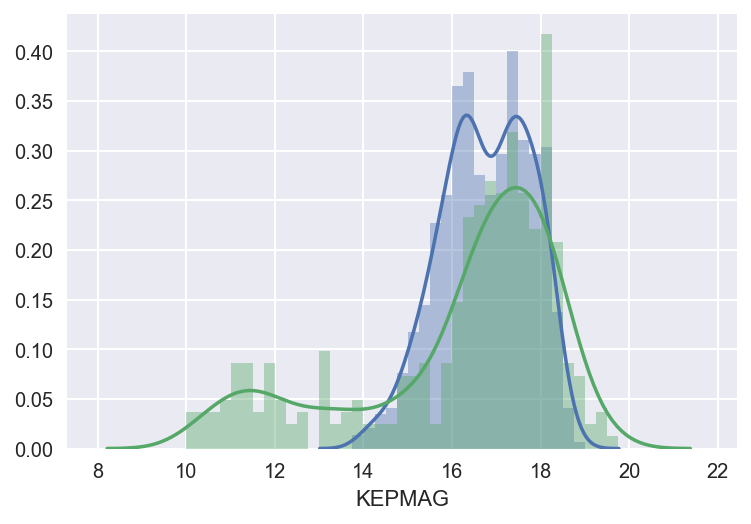

In [16]:
bins = np.arange(8, 22, 0.25)
sns.distplot(KEGS_non_everest.KEPMAG, bins=bins)
sns.distplot(kegs_everest_c05.KEPMAG, bins=bins)

All of the bright KEGS sources were detrended with Everest, and some of the faint targets were.

In [38]:
kegs_everest_c05['KEPLERID'].values

array([211305171, 211311876, 211312434, 211316816, 211317575, 211317725,
       211318777, 211320303, 211320689, 211321727, 211324272, 211327533,
       211327561, 211329564, 211329782, 211332955, 211334279, 211336332,
       211336576, 211336767, 211341772, 211346083, 211346149, 211346470,
       211346668, 211348567, 211349407, 211352575, 211359991, 211362257,
       211374878, 211376360, 211376898, 211377253, 211377762, 211377821,
       211378205, 211378569, 211382580, 211383902, 211384920, 211385002,
       211386909, 211387883, 211391030, 211393064, 211393475, 211393769,
       211395570, 211396061, 211397522, 211397697, 211400205, 211403266,
       211405578, 211405949, 211407110, 211410752, 211413377, 211422229,
       211422515, 211425124, 211428476, 211430256, 211432390, 211438762,
       211439701, 211439899, 211477955, 211478078, 211483973, 211484082,
       211484290, 211489394, 211493708, 211496134, 211497877, 211498654,
       211508508, 211510027, 211515210, 211515945, 

In [18]:
import everest

We've already downloaded almost all of the Everest Campaign 5 lightcurves, following the [Everest Bulk Download Instructions](http://staff.washington.edu/rodluger/everest/bulk.html)

In [ ]:
for EPIC_ID in kegs_everest_c05['KEPLERID'].values:
    star = everest.Everest(EPIC_ID)

INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211305171.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211311876.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211312434.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211316816.
INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 211317575.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211317725.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211318777.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS f

INFO  [everest.user.load_fits()]: Loading FITS file for 211432390.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211438762.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211439701.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211439899.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211477955.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211478078.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211483973.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211484082.
INFO  [everest.user.DownloadFile()]: 

INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211684343.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211684775.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211686479.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211686541.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211686805.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211691358.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211692204.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading F

In [43]:
star.kernel_params

array([  6.07001563e-01,   2.83796659e+03,   1.00000000e+02])

INFO  [everest.basecamp.plot_aperture()]: Plotting the aperture...


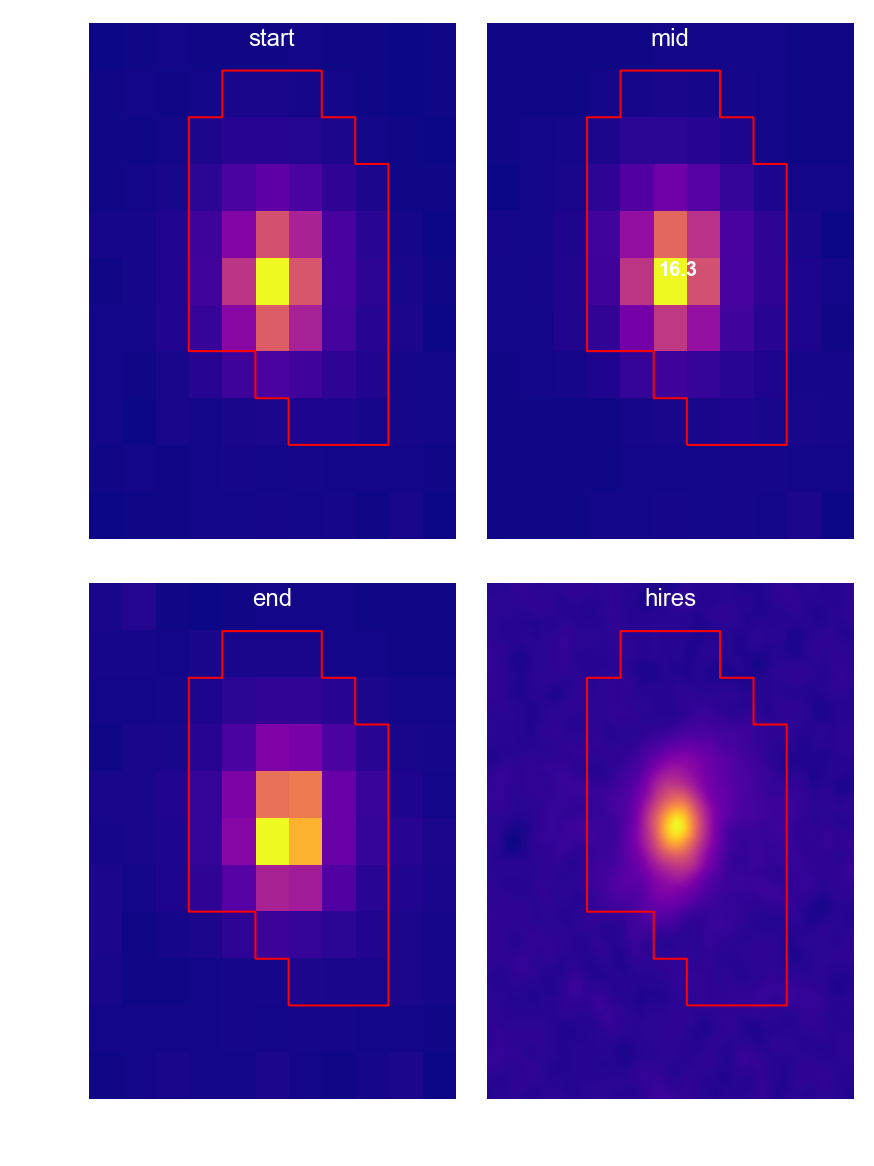

In [44]:
star.plot_aperture()

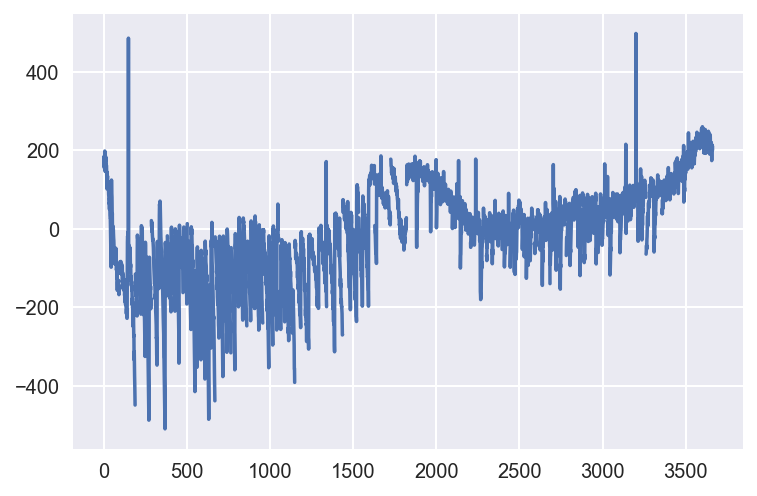

In [45]:
plt.plot(star.model)

(0, 7007.4830392092463)

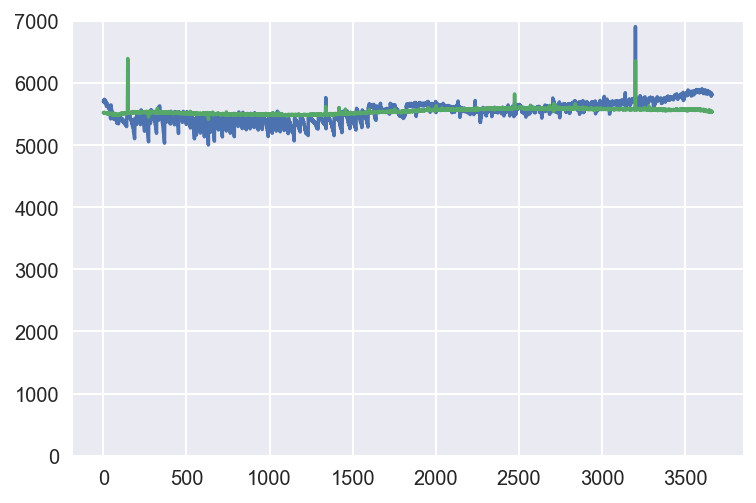

In [46]:
plt.plot(star.fraw)
plt.plot(star.fcor)
plt.ylim(0)

In [47]:
star.dvs()

INFO  [everest.user.DownloadFile()]: Downloading the file...


INFO  [everest.user.plot()]: Plotting the light curve...


/Users/obsidian/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Users/obsidian/GitHub/everest/everest/user.py:628: RuntimeWarning: invalid value encountered in less
  for i in np.where(flux < ylim[0])[0]:
/Users/obsidian/GitHub/everest/everest/user.py:644: RuntimeWarning: invalid value encountered in greater
  for i in np.where(flux > ylim[1])[0]:


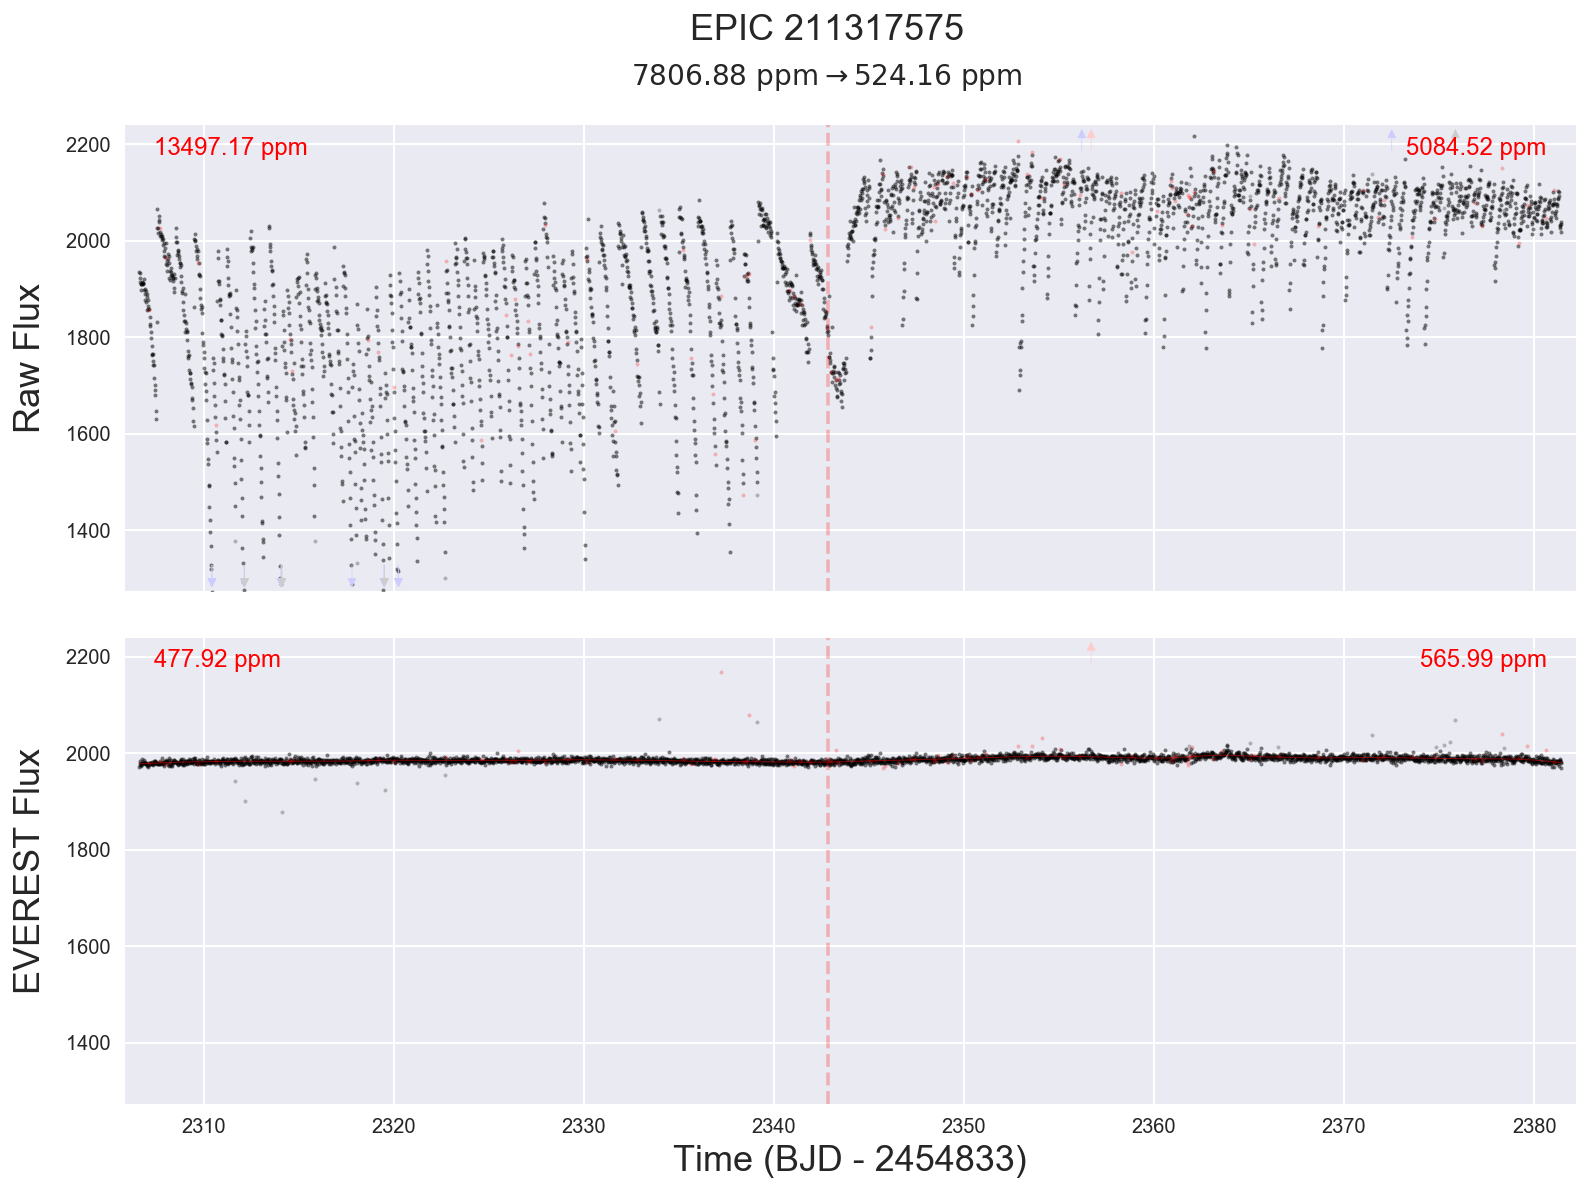

In [41]:
star.plot()

<!--NAVIGATION-->
< [Spot check some Target Pixel Files](01.04-Spot_check_TPFs.ipynb) | [Contents](Index.ipynb) | [Spot-check Everest Validation Summaries for KEGS](01.06-Everest_KEGS_DVS.ipynb) >